In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 32
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.19 		 0.4 |
| 1000 		 0.47 		 0.01 |
| 1000 		 0.04 		 0.34 |
| 1000 		 0.25 		 0.08 |
| 1000 		 0.12 		 0.1 |
| 1000 		 0.15 		 0.36 |
| 1000 		 0.18 		 0.03 |
| 1000 		 0.14 		 0.11 |
| 1000 		 0.15 		 0.45 |
| 1000 		 0.11 		 0.05 |
| 1000 		 0.08 		 0.15 |
| 1000 		 0.07 		 0.1 |
| 1000 		 0.3 		 0.32 |
| 1000 		 0.17 		 0.33 |
| 1000 		 0.1 		 0.21 |
| 1000 		 0.09 		 0.18 |
| 1000 		 0.06 		 0.31 |
| 1000 		 0.01 		 0.16 |
| 1000 		 0.0 		 0.04 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.15
The s.d. of I is: 0.13
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.21
The mean of I is: 0.19
-------------------------------------


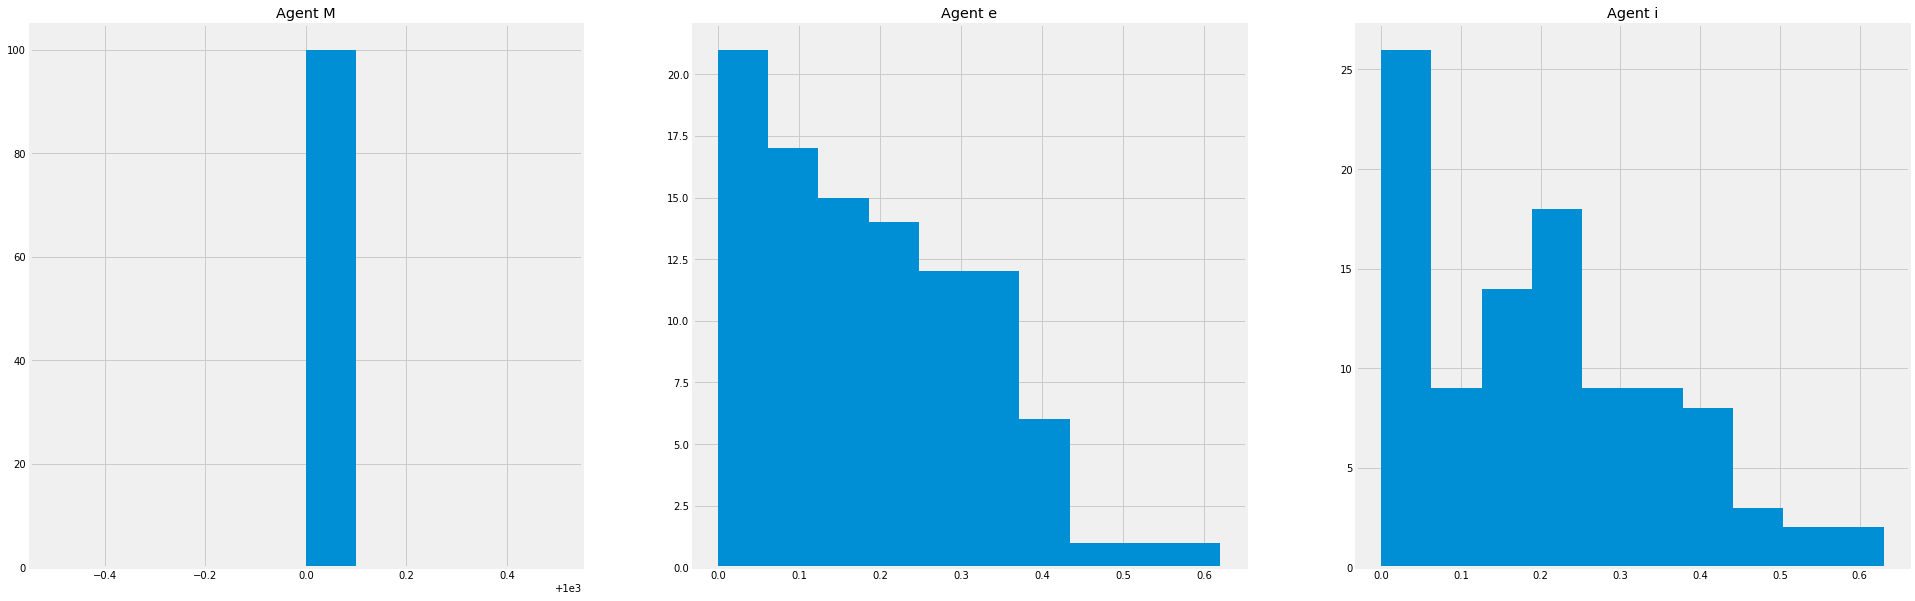

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 2.0, Temptation: 190.0, Sucker: -188.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 468.0, Temptation: 470.0, Sucker: -2.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 174.0, Temptation: 190.0, Sucker: -16.0, Punishment: 0
Agent 2 playing Agent 0: Reward: -25.0, Temptation: 40.0, Sucker: -65.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 90.0, Temptation: 190.0, Sucker: -100.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 235.0, Temptation: 250.0,

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 45 minutes.
    S.D.  Counts Seed
0    0.5     243   32
1    0.6     244   32
2    0.7     221   32
3    0.8     183   32
4    0.9     177   32
5    1.0     180   32
6    1.1     157   32
7    1.2     158   32
8    1.3     144   32
9    1.4     136   32
10   1.5     129   32
11   1.6      92   32
12   1.7      48   32
13   1.8      34   32
14   1.9      23   32
15   2.0      21   32
16   2.1      18   32
17   2.2      19   32
18   2.3      16   32
19   2.4      13   32
20   2.5       9   32
21   2.6      11   32
22   2.7       9   32
23   2.8       3   32
24   2.9       3   32
25   3.0       2   32


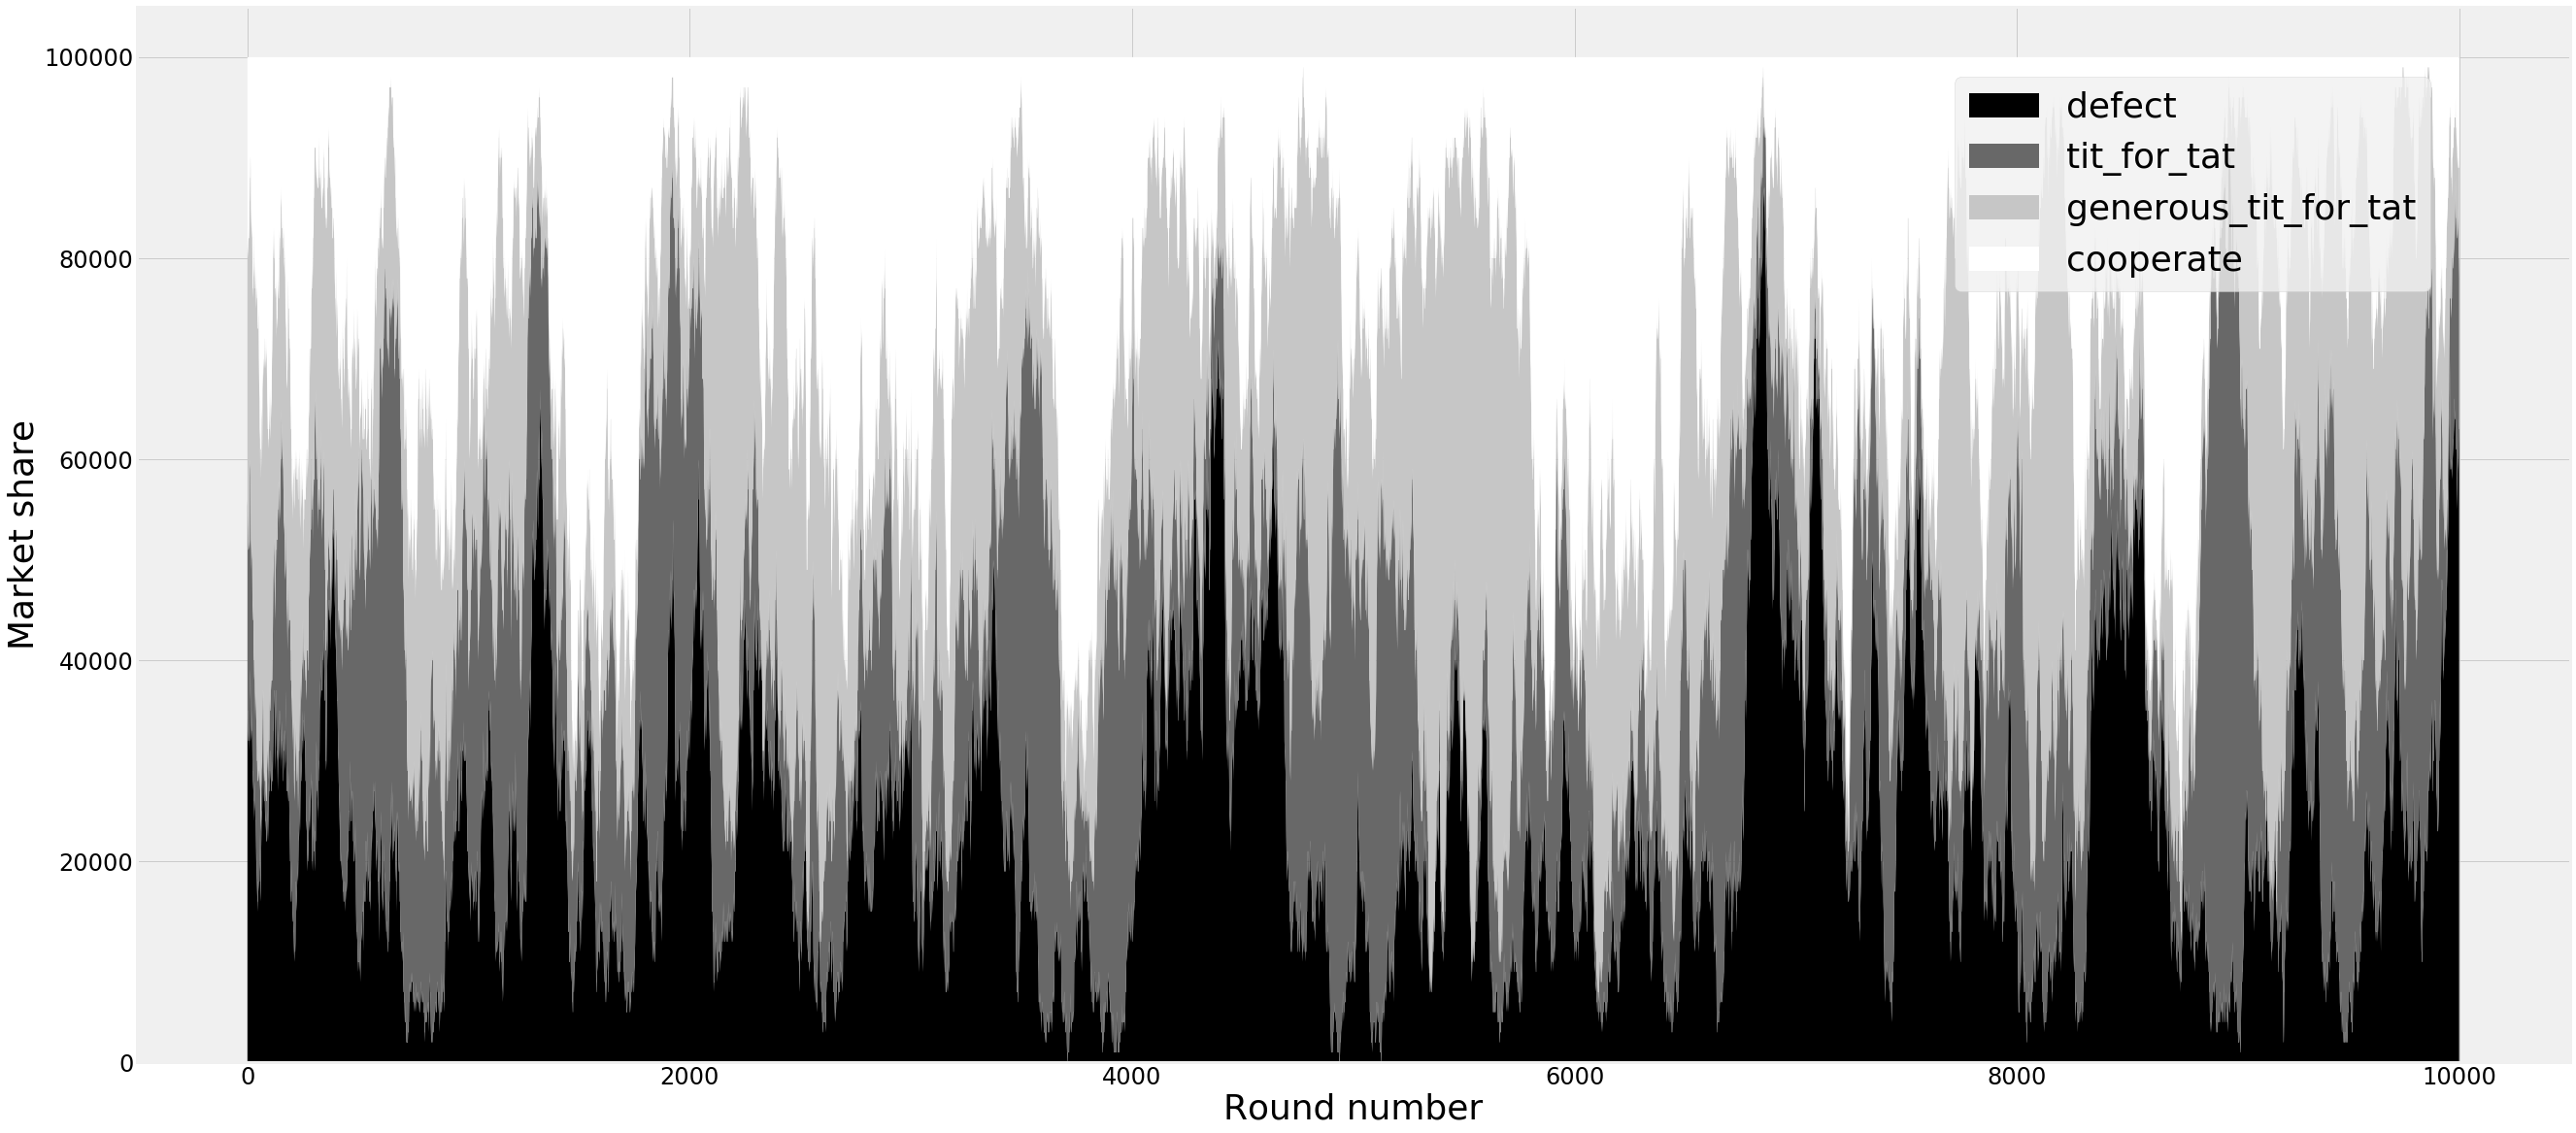

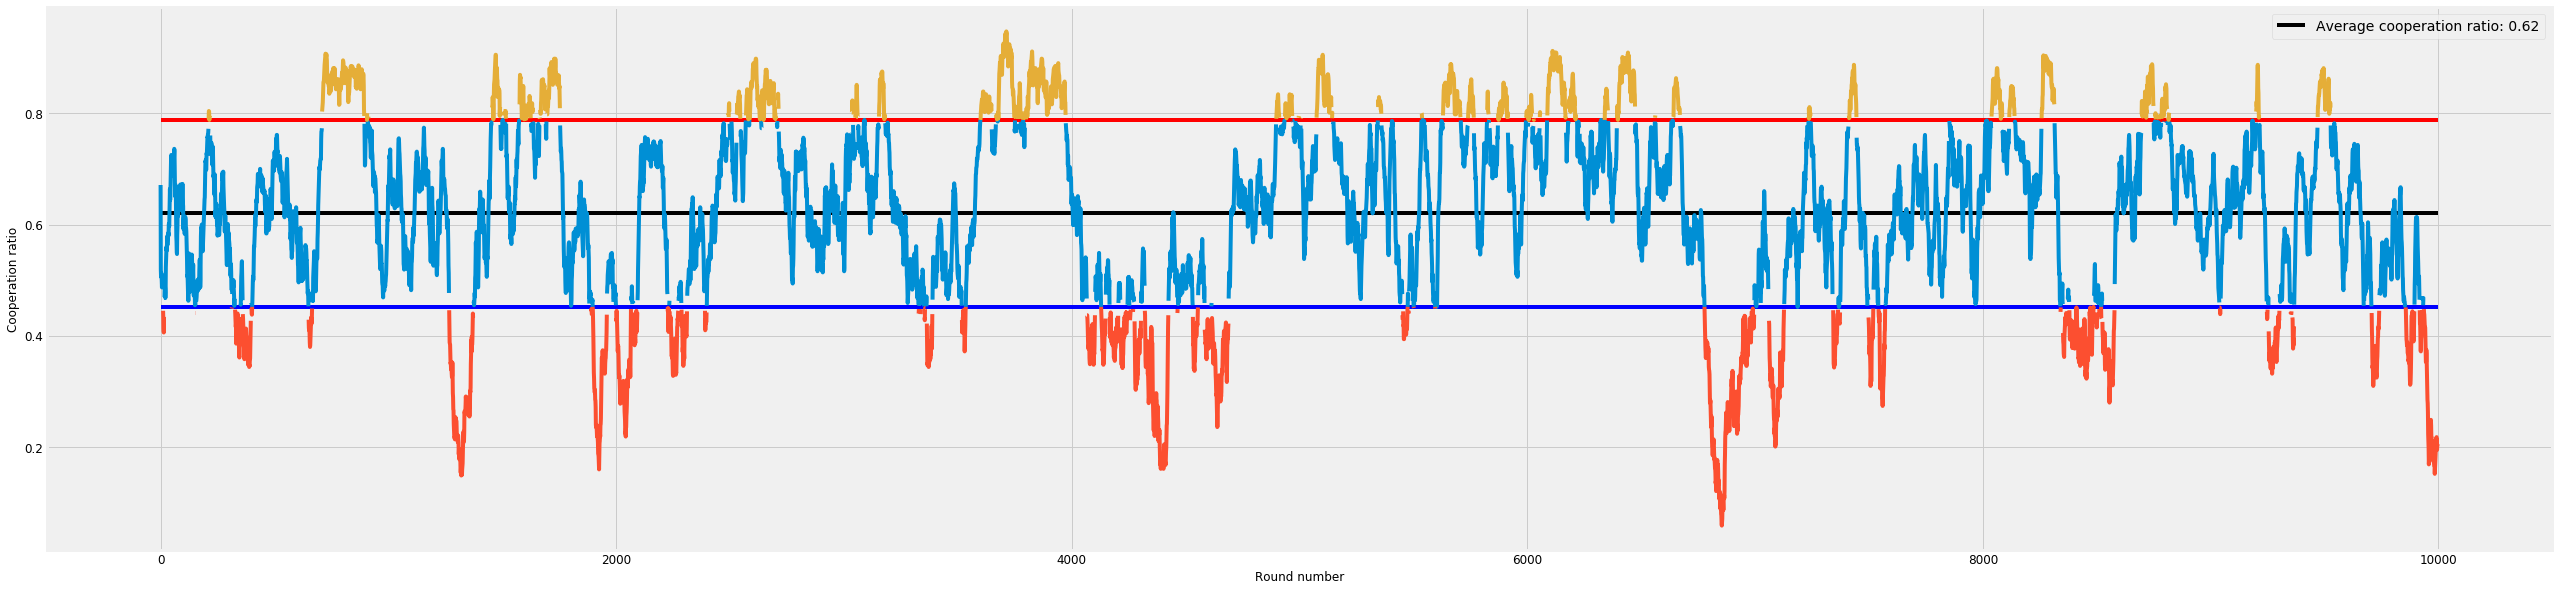

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdei", seed = str(seed))